# Learning Word Embeddings

In [0]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [0]:
tf.random.set_seed(42)

## Dataset - IMDB

In [8]:
imdb = keras.datasets.imdb

max_features = 20000

(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = max_features)


# Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz
# 17465344/17464789 [==============================] - 8s 0us/step


print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

Xtrain = keras.preprocessing.sequence.pad_sequences(Xtrain, maxlen =25)
Xtest = keras.preprocessing.sequence.pad_sequences(Xtest, maxlen =25)

print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

17465344/17464789 [==============================] - 0s 0us/step
25000 25000
25000 25000
25000 25000
25000 25000


## LSTM

In [9]:
lstmModel = keras.models.Sequential()

lstmModel.add(keras.layers.Embedding(input_dim = max_features, output_dim = 128))

lstmModel.add(keras.layers.LSTM(128, dropout=0.2)) #, recurrent_dropout=0.2

lstmModel.add(keras.layers.Dense(1, activation = 'sigmoid'))

lstmModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

lstmModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# train the model

history = lstmModel.fit(Xtrain, Ytrain, epochs = 15, batch_size=16, validation_split=0.2, verbose=1 )

Epoch 1/15
1250/1250 [==============================] - 28s 23ms/step - loss: 0.5100 - accuracy: 0.7418 - val_loss: 0.4673 - val_accuracy: 0.7632
Epoch 2/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.3515 - accuracy: 0.8446 - val_loss: 0.4867 - val_accuracy: 0.7622
Epoch 3/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.2371 - accuracy: 0.9037 - val_loss: 0.5927 - val_accuracy: 0.7556
Epoch 4/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.1519 - accuracy: 0.9405 - val_loss: 0.6633 - val_accuracy: 0.7482
Epoch 5/15
1250/1250 [==============================] - 28s 23ms/step - loss: 0.0936 - accuracy: 0.9653 - val_loss: 1.0900 - val_accuracy: 0.7462
Epoch 6/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0573 - accuracy: 0.9787 - val_loss: 1.1628 - val_accuracy: 0.7442
Epoch 7/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0381 - accuracy: 0.9868 - val_loss: 1.1665 -

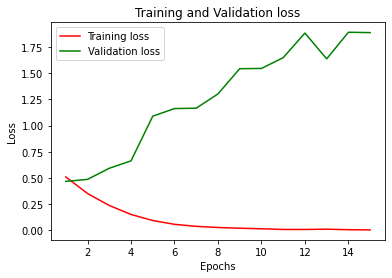

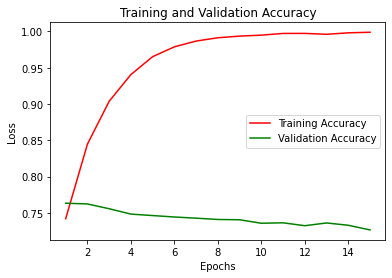

In [14]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#pd.DataFrame(history.history).plot()
#plt.show()

# plotting training and validation loss

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training Accuracy')
plt.plot(epochs, val_loss, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
testLoss, testAccuracy = lstmModel.evaluate(Xtest, Ytest)
print(testLoss, testAccuracy)

782/782 [==============================] - 2s 3ms/step - loss: 1.8250 - accuracy: 0.7332
1.8249614238739014 0.7332000136375427
